backpropagation to train a network

source: [arXiv:1801.05894v1](https://arxiv.org/abs/1801.05894) by Highman C & D

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def activate(x,Wb,debug=False):
    r""" receive a random vector x and apply the sigmoid"""
    xp = (np.dot(Wb['W'],x.T) + Wb['b'].T)[0]
    if debug: print('Wb.x + b',x)
    s = 1/(1+np.exp(-xp))
    return s

In [134]:
#define threshold and other parameters
th = 0.5
eta = 0.05  # learning rate
n   = int(1e6)   # number of iterations
nlayers = 4
nnodes  = [2,3,3,2] #[4,3,2] # nodes per layer, including the input layer

plot  = True
debug = True
# data
x1 = [0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7]
x2 = [0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]

# organize data in a single array
x = np.vstack((x1,x2)).T

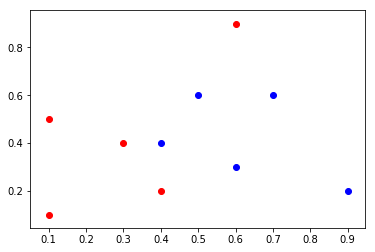

In [135]:
# plot the data
if plot:
    x_th = y[0,:]==1
    plt.scatter(x[x_th,0],x[x_th,1], c='red')
    x_th = np.invert(x_th)
    plt.scatter(x[x_th,0],x[x_th,1], c='blue')

In [136]:
# initialize variables
nxh = np.int(np.size(x,0)/2)

y = np.concatenate([np.ones(nxh),np.zeros(nxh)])
y = np.vstack((y,y[::-1]))

np.random.seed(5000)

In [137]:
Wb = {}
pp = {}
nnodest = np.concatenate([[np.size(x,1)],nnodes])
for i in range(1,nlayers+1):
    k = nnodest[i]
    km = nnodest[i-1]
    if debug: print(k,km)
    Wb[i] = {'W':0.5*np.random.randn(k,km),'b':0.5*np.random.randn(k,1)}
    pp[i] = {'a':[],'d':[]}

2 2
3 2
3 3
2 3


In [138]:
for i in range(0,n):
    k  = np.random.randint(2*nxh-1)
    xp = x[k,:]
    pp[0] = {'a':xp}
    # forward step
    for j in range(1,nlayers+1):
        pp[j]['a'] = activate(pp[j-1]['a'],Wb[j])
    #backward step
    for j in range(nlayers,0,-1):
        pp[j]['d'] = pp[j]['a']*(1-pp[j]['a'])
        if j == nlayers:
            pp[j]['d'] = pp[j]['d']*(pp[j]['a']-y[:,k]) 
        else:
            pp[j]['d'] = pp[j]['d']*(np.dot(Wb[j+1]['W'].T,pp[j+1]['d']))
    # gradient step
    for j in range(1,nlayers+1):
        Wb[j]['W'] = Wb[j]['W'] - eta*np.outer(pp[j]['d'],pp[j-1]['a'].T)
        Wb[j]['b'] = Wb[j]['b'] - eta*pp[j]['d']

In [139]:
# create meshgrid np.linspace(0,1,100)
xt = np.linspace(0,1,101)
X,Y = np.meshgrid(np.linspace(0,1,101),np.linspace(0,1,101))
xx = np.vstack([X.ravel(), Y.ravel()])

In [140]:
F = [0,0]
f = {}
for i in range(0,np.size(xx,1)):
    f[0] = {'a':xx[:,i]}
    for j in range(1,nlayers+1):
        f[j] = {'a':activate(f[j-1]['a'],Wb[j])}
    F = np.append(F,f[j]['a'])#.reshape([i+1,2])
F = F.reshape(101*101+1,2)[1::]

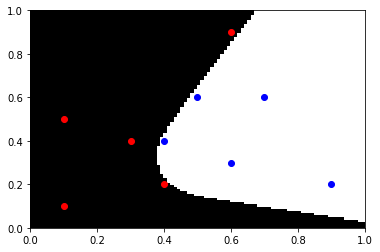

In [141]:
x_th = y[0,:]==1
Fbinary = F[:,1]>F[:,0]
#plt.hold(True)
plt.pcolor(X,Y,Fbinary.reshape([101,101]),cmap='binary_r')
plt.scatter(x[x_th,0],x[x_th,1], c='red')
x_th = np.invert(x_th)
plt.scatter(x[x_th,0],x[x_th,1], c='blue')